# 数据分析与可视化

1. （任务1.2）计算每台售货机2017年5月份的交易额、订单量及所有售货机交易总额和订单总量
2. （任务1.3）计算每台售货机每月的每单平均交易额与日均订单量
3. （任务2.1）绘制2017年6月销量前5的商品销量柱状图
4. （任务2.2）绘制每台售货机每月总交易额折线图及交易额月环比增长率柱状图
5. （任务2.3）绘制每台售货机毛利润占总毛利润比例的饼图(假设饮料类毛利率为25% ,非饮料类为20% )
6. （任务2.4）绘制每月交易额均值气泡图,横轴为时间,纵轴为商品的二级类目
7. （任务2.5）绘制售货机C6、7、8三个月订单量的热力图,横轴以天为单位,纵轴以小时为单位

## 0. 导入模块

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

## 1. 5月份的交易情况

In [39]:
place=['A','B','C','D','E']
#使用两个列表存储数据
month5_transaction_amount=list()
monrh5_order_quantity=list()

#计算
for pla in place:
    f=open('../数据/分割数据/task1-1'+pla+'.csv')
    data=pd.read_csv(f)
    data['支付时间'] = pd.to_datetime(data['支付时间']) #转换为时间格式
    month5_sales_data=data[data['支付时间'].dt.month==5] #提取5月份数据
    money=month5_sales_data['金额'].sum() #计算交易额
    month5_transaction_amount.append(money)
    quan=len(month5_sales_data['金额']) #计算订单量
    monrh5_order_quantity.append(quan)

In [40]:
#显示数据
month5=pd.DataFrame(np.array([month5_transaction_amount+[np.sum(month5_transaction_amount)],
                              monrh5_order_quantity+[np.sum(monrh5_order_quantity)]]),
                    index=['交易额','订单量'],columns=place+['总和'])
month5

,A,B,C,D,E,总和
交易额,2734.1,2902.5,2817.3,1872.2,4231.8,14557.9
订单量,679.0,734.0,665.0,499.0,1048.0,3625.0


## 2. 每台售货机每月的每单平均交易额与日均订单量

In [41]:
#总交易额
total_amount=dict()
#平均交易额
mean_amount=dict()
#日均订单量
mean_quantity=dict()

for pla in place:
    f=open('../数据/分割数据/task1-1'+pla+'.csv')
    data=pd.read_csv(f)
    data['支付时间'] = pd.to_datetime(data['支付时间'])
    #月份
    for mon in range(1,13):
        month_data=data[data['支付时间'].dt.month==mon]
        money=month_data['金额'].sum()
        quan=len(month_data['金额'])
        #统计每个月有数据的天数
        days=len(month_data.groupby(month_data['支付时间'].dt.day))
        #以字典存储数据
        total_amount.update({pla+str(mon):money})
        mean_amount.update({pla+str(mon):round(money/quan,3)})
        mean_quantity.update({pla+str(mon):int(float(quan)/days)})

In [42]:
#A地区数据
month_name=['一月', '二月', '三月', '四月', '五月','六月','七月','八月','九月','十月','十一月','十二月']
A_mean_amount=list()
A_mean_quantity=list()
for mon in range(1,13):
    A_mean_amount.append(mean_amount['A'+str(mon)])
    A_mean_quantity.append(mean_quantity['A'+str(mon)])

place_A=pd.DataFrame(np.array([A_mean_amount,A_mean_quantity]),index=['平均交易额','日均订单量'],columns=month_name)
place_A

,一月,二月,三月,四月,五月,六月,七月,八月,九月,十月,十一月,十二月
平均交易额,3.951,3.714,3.379,3.815,4.027,3.68,3.716,3.24,3.946,3.706,4.089,3.55
日均订单量,12.000,4.000,47.000,13.000,22.000,50.00,16.000,20.00,30.000,45.000,34.000,59.00


In [43]:
#B地区数据
B_mean_amount=list()
B_mean_quantity=list()
for mon in range(1,13):
    B_mean_amount.append(mean_amount['B'+str(mon)])
    B_mean_quantity.append(mean_quantity['B'+str(mon)])

place_B=pd.DataFrame(np.array([B_mean_amount,B_mean_quantity]),index=['平均交易额','日均订单量'],columns=month_name)
place_B

,一月,二月,三月,四月,五月,六月,七月,八月,九月,十月,十一月,十二月
平均交易额,3.546,3.26,3.53,3.62,3.954,3.831,4.031,3.547,3.909,3.814,3.952,3.579
日均订单量,15.000,7.00,40.00,17.00,24.000,54.000,11.000,30.000,53.000,58.000,63.000,66.000


In [44]:
#C地区数据
C_mean_amount=list()
C_mean_quantity=list()
for mon in range(1,13):
    C_mean_amount.append(mean_amount['C'+str(mon)])
    C_mean_quantity.append(mean_quantity['C'+str(mon)])

place_C=pd.DataFrame(np.array([C_mean_amount,C_mean_quantity]),index=['平均交易额','日均订单量'],columns=month_name)
place_C

,一月,二月,三月,四月,五月,六月,七月,八月,九月,十月,十一月,十二月
平均交易额,3.916,3.8,3.514,3.946,4.237,3.942,3.793,3.869,4.118,3.901,4.092,3.766
日均订单量,12.000,7.0,40.000,21.000,22.000,53.000,24.000,38.000,50.000,63.000,59.000,70.000


In [45]:
#D地区数据
D_mean_amount=list()
D_mean_quantity=list()
for mon in range(1,13):
    D_mean_amount.append(mean_amount['D'+str(mon)])
    D_mean_quantity.append(mean_quantity['D'+str(mon)])

place_D=pd.DataFrame(np.array([D_mean_amount,D_mean_quantity]),index=['平均交易额','日均订单量'],columns=month_name)
place_D

,一月,二月,三月,四月,五月,六月,七月,八月,九月,十月,十一月,十二月
平均交易额,3.545,3.08,3.9,3.509,3.752,3.726,3.8,3.29,3.626,3.565,3.64,3.428
日均订单量,11.000,5.00,44.0,13.000,16.000,31.000,10.0,22.00,30.000,35.000,38.00,50.000


In [46]:
#E地区数据
E_mean_amount=list()
E_mean_quantity=list()
for mon in range(1,13):
    E_mean_amount.append(mean_amount['E'+str(mon)])
    E_mean_quantity.append(mean_quantity['E'+str(mon)])

place_E=pd.DataFrame(np.array([E_mean_amount,E_mean_quantity]),index=['平均交易额','日均订单量'],columns=month_name)
place_E

,一月,二月,三月,四月,五月,六月,七月,八月,九月,十月,十一月,十二月
平均交易额,3.926,3.624,4.193,3.841,4.038,3.605,3.743,3.68,3.851,3.607,4.013,3.951
日均订单量,11.000,8.000,45.000,25.000,34.000,76.000,23.000,52.00,121.000,81.000,148.000,91.000


## 3. 绘制6月销量前5的商品销量柱状图

In [3]:
#设置默认字体
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [48]:
f=open('../数据/初步处理数据.csv')
sell_data=pd.read_csv(f)
sell_data['支付时间'] = pd.to_datetime(sell_data['支付时间'])
month6_sales_data=sell_data[sell_data['支付时间'].dt.month==6]   #6月份整体数据  #产生的数据为series类型，包含两列信息
goods=month6_sales_data['商品'].value_counts()  #统计商品销量
#goods.index存储商品名称，goods.values存储销量
#销量前五的商品名称
goods_name=goods.index[0:5]
x=range(0,5)
#对应的销量
good_count=goods.values[0:5]

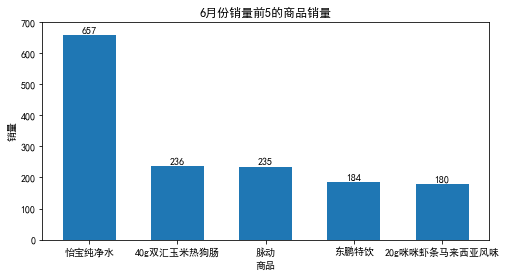

In [49]:
plt.subplots(figsize = (8,4))
plt.bar(x,good_count,width=0.6)
plt.xticks(x, goods_name) #,rotation=10
#在柱状图上方添加数值
for x, y in enumerate(good_count):
    plt.text(x, y + 3, '%s' % y, ha='center', va='bottom')
plt.xlabel("商品") #X轴标签
plt.ylabel("销量") #Y轴标签
plt.ylim(0,700)
plt.title("6月份销量前5的商品销量") #标题
plt.savefig('../图片/任务2/任务2.1-柱状图.png')
plt.show()

## 4. 总交易额折线图及交易额月环比增长率柱状图

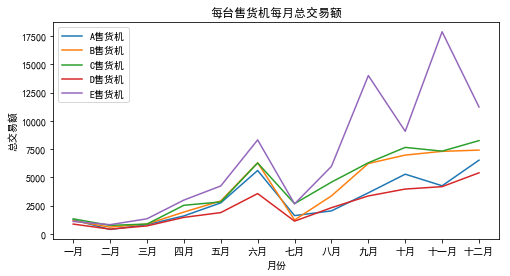

In [50]:
#每台售货机每月总交易额折线图
months=[i for i in range(1,13)] #月份
plt.subplots(figsize = (8,4))
for pla in place:
    #新建一个列表保存数据
    money=list()
    for mon in months:
        money.append(total_amount[pla+str(mon)])
    plt.plot(months, money,  mec='r', mfc='w',label=pla+'售货机')

plt.legend()  # 让图例生效
plt.xticks(months, month_name)
plt.xlabel("月份") #X轴标签
plt.ylabel("总交易额") #Y轴标签
plt.title("每台售货机每月总交易额") #标题
plt.savefig('../图片/任务2/任务2.2-折线图.png')
plt.show()

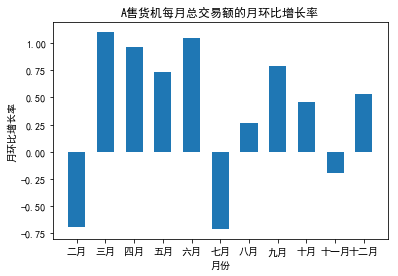

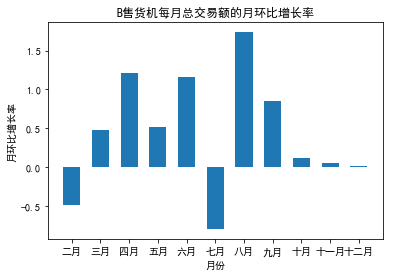

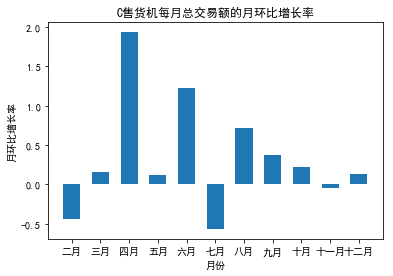

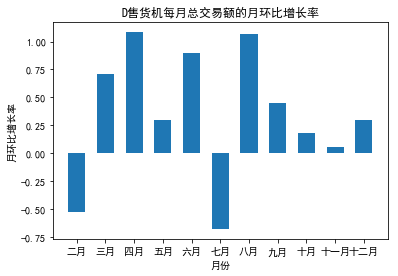

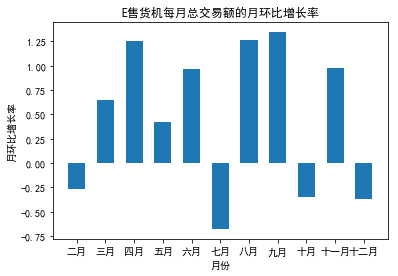

In [51]:
months=[i for i in range(2,13)] #月份
month_name = ['二月', '三月', '四月', '五月','六月','七月','八月','九月','十月','十一月','十二月']
#交易额月环比增长率柱状图
for pla in place:
    #新建一个列表保存数据
    growth_rate=list()
    for mon in months:
        growth_rate.append((total_amount[pla+str(mon)]-total_amount[pla+str(mon-1)])/total_amount[pla+str(mon-1)])
    plt.bar(months,growth_rate,width=0.6)
    plt.xticks(months, month_name)
    plt.title(pla+'售货机每月总交易额的月环比增长率')
    plt.xlabel("月份") #X轴标签
    plt.ylabel("月环比增长率") #Y轴标签
    plt.savefig('../图片/任务2/任务2.2-'+pla+'售货机每月总交易额的月环比增长率.png')
    plt.show()

## 5. 毛利润饼状图

In [52]:
#计算总的毛利润
f=open('../数据/初步处理数据.csv')
data=pd.read_csv(f)
#分别计算饮料和非饮料的总收入
total_income=data.groupby(data['商品大类'])['金额'].sum()
#分别计算饮料和非饮料的毛利润
NonDrink_total_profit=total_income['非饮料']*0.2
Drink_total_profit=total_income['饮料']*0.25
#总的毛利润
total_profit=NonDrink_total_profit+Drink_total_profit

In [53]:
#计算各个地区的毛利润
profit=list()  #保存地区利润
for pla in place:
    f=open('../数据/分割数据/task1-1'+pla+'.csv')
    place_data=pd.read_csv(f)
    #分别计算各个地区的饮料和非饮料的总收入
    place_income=place_data.groupby(place_data['商品大类'])['金额'].sum()
    #分别计算各个地区的饮料和非饮料的毛利润
    NonDrink_place_profit=place_income['非饮料']*0.2
    Drink_place_profit=place_income['饮料']*0.25
    place_profit=NonDrink_place_profit+Drink_place_profit
    #保存于列表中
    profit.append(round(place_profit/total_profit*100,2))

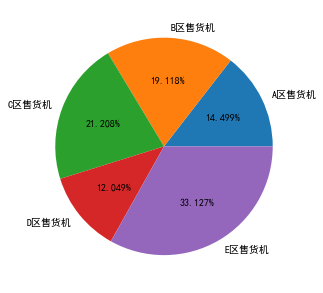

In [54]:
#绘图
labels ='A区售货机','B区售货机','C区售货机','D区售货机','E区售货机'
plt.subplots(figsize = (5,5))
plt.axes(aspect=1) #标准圆
plt.pie(x=profit,labels= labels,autopct='%0.3f%%')
plt.savefig('../图片/任务2/任务2.3-饼状图.png')
plt.show()   

## 6. 每月交易额均值气泡图

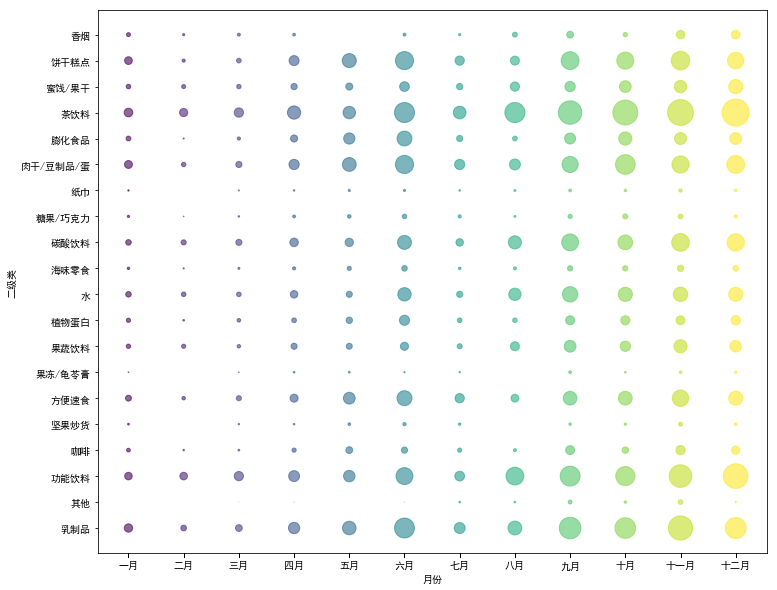

In [5]:
f=open('../数据/初步处理数据.csv')
data=pd.read_csv(f)
data=data.loc[:,['支付时间','金额','商品二级类']]
data['支付时间'] = pd.to_datetime(data['支付时间'])
group=data.groupby(['商品二级类',data['支付时间'].dt.month])['金额'].sum()

#设置每月天数
month_day=list()
for mon in range(1,13):
    if mon in [1,3,5,7,8,10,12]:
        month_day.append(31)
    elif mon in [4,6,9,11]:
        month_day.append(30)
    else:
        month_day.append(28)

#处理元组数据，元组数据中包含二级类和月份，主要是分离两个属性，构成一个列表
m=list(map(list,zip(*list(group.index))))  

#分离三种数据
x=m[1]  #月份数据
y=m[0]  #二级类
z=group.values #总交易额

#计算交易额均值
for i in range(len(z)):
    j=i%12
    z[i]=z[i]/month_day[j]

names = ['一月', '二月', '三月', '四月', '五月','六月','七月','八月','九月','十月','十一月','十二月']
plt.subplots(figsize = (12,10))
plt.scatter(x,y,s=z*3,alpha=0.6,c=x)
plt.xticks(x, names)
plt.xlabel("月份") #X轴标签
plt.ylabel("二级类") #Y轴标签
plt.savefig('../图片/任务2/任务2.4-气泡图.png',dpi=1000)
plt.show()

## 7. 热力图

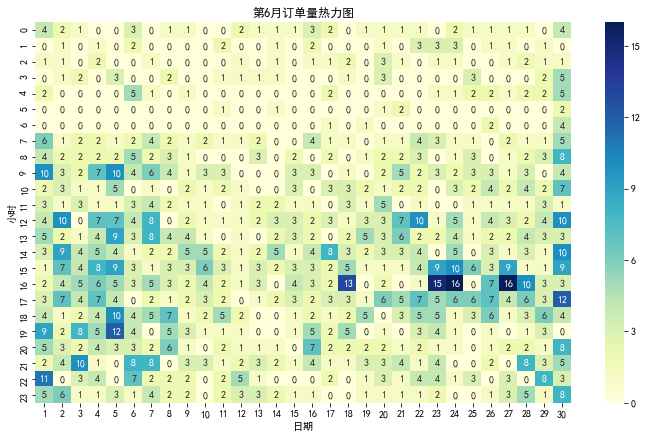

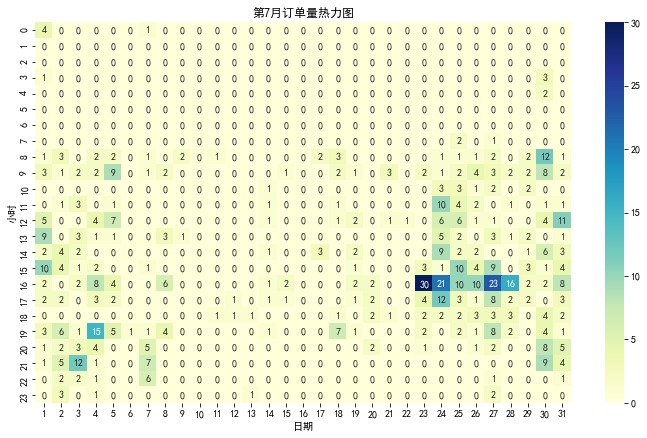

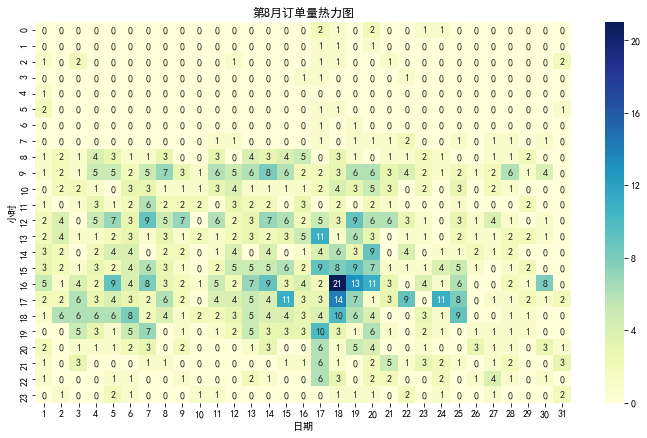

In [6]:
f=open('../数据/分割数据/task1-1C.csv')
C_data=pd.read_csv(f)
C_data['支付时间'] = pd.to_datetime(C_data['支付时间'])
for mon in range(6,9):
    month_data=C_data[C_data['支付时间'].dt.month==mon]
    order_quantity_group=month_data.groupby([month_data['支付时间'].dt.day,month_data['支付时间'].dt.hour]).size()
    m=list(map(list,zip(*list(order_quantity_group.index))))  #分离元组，包含天和小时数据
    #新建一个矩阵
    if mon == 6:
        day=30
    else:
        day=31
    new_array=np.zeros((day,24))    
    for i,j in zip(m[0],m[1]):
        new_array[i-1][j]=order_quantity_group[(i,j)]
        
    plt.subplots(figsize=(12, 7)) # 设置画面大小
    sns.heatmap(new_array.T, annot=True,xticklabels= range(1,day+1), yticklabels= True,  cmap="YlGnBu") #绘制热力图
    plt.title('第'+str(mon)+'月订单量热力图') #加标题
    plt.xlabel("日期") #X轴标签
    plt.ylabel("小时") #Y轴标签
    plt.savefig('../图片/任务2/任务2.5-'+str(mon)+'热力图.png',dpi=500)
    plt.show()